<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Fotometria_Estrelas_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Fotometria de Estrelas
### Este notebook lê um arquivo CSV contendo dados de fotometria de estrelas e visualiza as 10 primeiras fotometrias como gráficos de linhas.

### 1. Importação das Bibliotecas

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Leitura do Arquivo CSV

In [14]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

### 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos.

In [15]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


### 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [16]:
#A coluna `MAG_APER_COR_3_0` contém múltiplos valores separados por espaços. Vamos dividi-la em 57 colunas separadas.
#Criamos uma lista de nomes para as novas colunas.

colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [17]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [18]:
#Dividimos a coluna `MAG_APER_COR_3_0` em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)

In [19]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)

In [20]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


### 5. Visualização das 10 Primeiras Fotometrias

O objetivo deste item é visualizar as magnitudes fotométricas das 10 primeiras estrelas em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

In [21]:
#Vamos plotar as 10 primeiras fotometrias como gráficos de linhas.
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

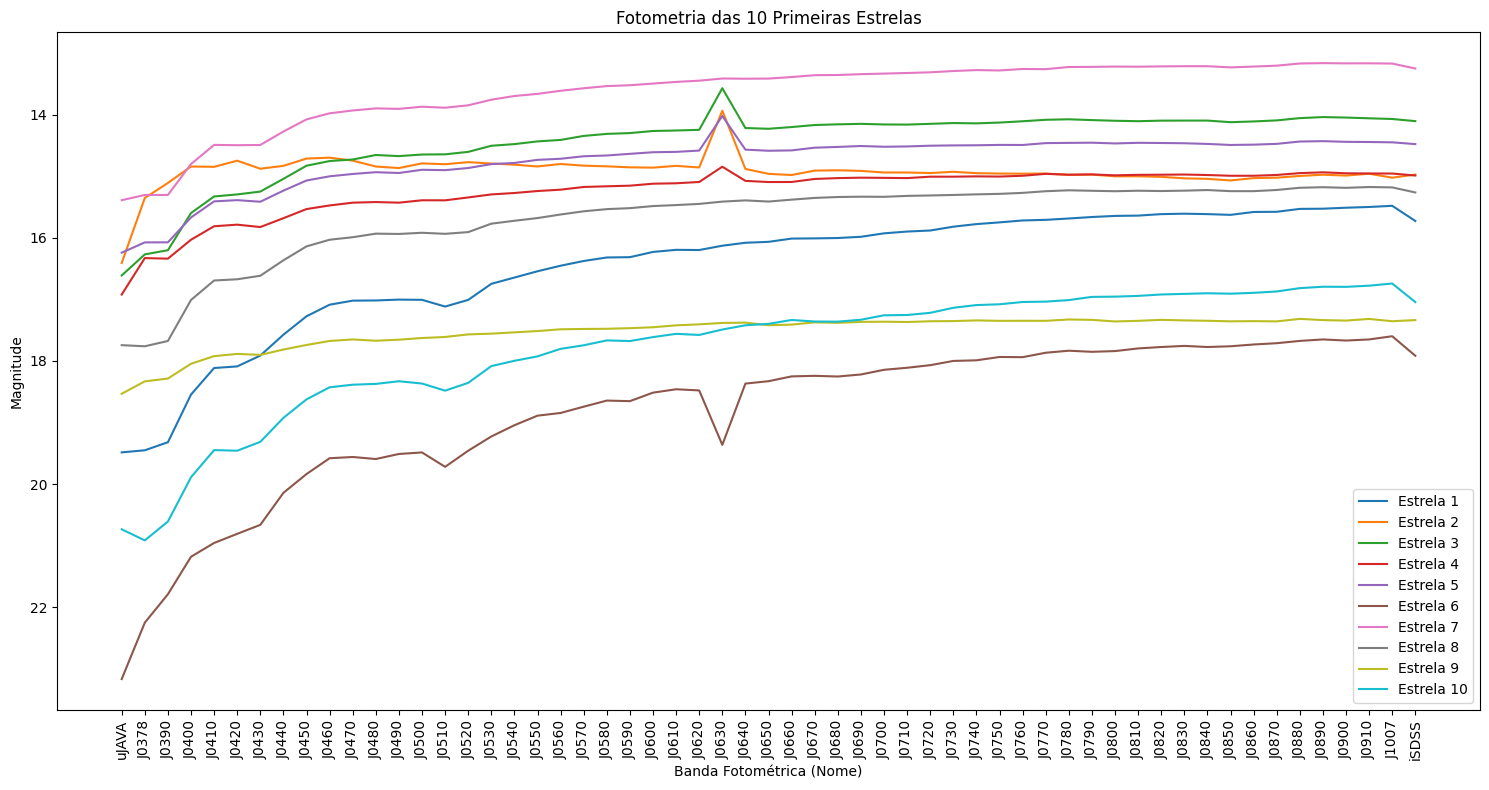

In [22]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

#Loop para plotar as 10 primeiras estrelas.

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, df.loc[i, columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria das 10 Primeiras Estrelas')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 6. Visualização de 10 Fotometrias de estrelas aleatórias

O objetivo deste item é visualizar as magnitudes fotométricas de 10 estrelas aleatórias em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

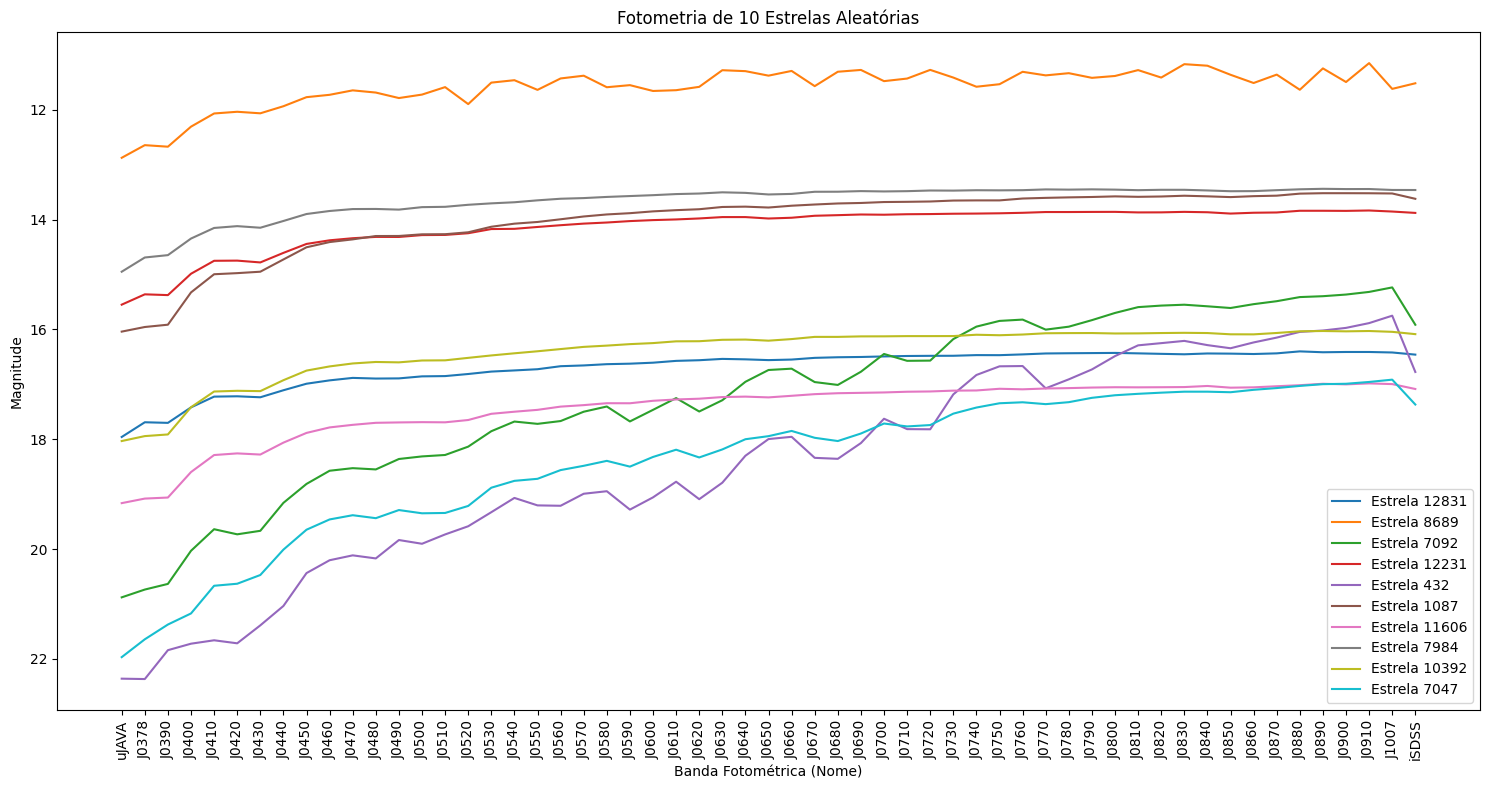

In [24]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Selecionar 10 estrelas aleatórias
random_stars = df.sample(n=10, random_state=42)  # random_state para reprodutibilidade

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 estrelas aleatórias
for i, row in random_stars.iterrows():
    plt.plot(filter_names, row[columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria de 10 Estrelas Aleatórias')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Análise dos Resultados

1. **Estrutura do Gráfico**:
   - O eixo X representa as **57 bandas fotométricas**, numeradas de 1 a 57.
   - O eixo Y representa as **magnitudes** das estrelas em cada banda fotométrica.
   - Cada linha no gráfico corresponde a uma das 10 primeiras estrelas do DataFrame.

2. **Legibilidade do Eixo X**:
   - Os rótulos do eixo X foram simplificados para mostrar apenas os números de 1 a 57, em vez dos nomes completos das colunas (como "Fotometria_1", "Fotometria_2", etc.).
   - Os rótulos foram rotacionados em 90 graus (`rotation=90`) para evitar sobreposição, garantindo que todos os números sejam visíveis.

3. **Comportamento das Curvas**:
   - Cada curva no gráfico mostra como a magnitude de uma estrela varia ao longo das 57 bandas fotométricas.
   - Estrelas com magnitudes mais baixas (valores menores no eixo Y) são mais brilhantes, enquanto magnitudes mais altas indicam estrelas mais fracas.
   - Se houver padrões semelhantes entre as curvas, isso pode indicar que as estrelas têm propriedades fotométricas semelhantes (por exemplo, pertencerem à mesma classe espectral ou estágio evolutivo).

4. **Legenda**:
   - A legenda identifica cada estrela pelo número correspondente (de 1 a 10).
   - Isso permite comparar facilmente o comportamento fotométrico de cada estrela.

5. **Melhorias na Visualização**:
   - O uso de `plt.tight_layout()` garante que o gráfico seja renderizado sem sobreposição de elementos.
   - O tamanho da figura (`figsize=(15, 8)`) foi aumentado para acomodar melhor os 57 rótulos no eixo X.


#### **Interpretação dos Dados**

- **Variação nas Magnitudes**:
  - Se as curvas das estrelas forem semelhantes, isso sugere que as estrelas têm propriedades fotométricas parecidas.
  - Se houver grandes diferenças entre as curvas, isso pode indicar que as estrelas têm características distintas (como temperaturas diferentes, estágios evolutivos diferentes ou presença de poeira interestelar).

- **Picos ou Vales**:
  - Picos (aumentos repentinos na magnitude) ou vales (quedas repentinas) podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão.

- **Comparação entre Estrelas**:
  - Estrelas com magnitudes consistentemente mais baixas (mais brilhantes) em todas as bandas podem ser estrelas mais próximas ou intrinsecamente mais luminosas.
  - Estrelas com magnitudes mais altas (mais fracas) podem ser estrelas mais distantes ou menos luminosas.

#### **Conclusão**

O gráfico fornece uma visão clara do comportamento fotométrico das 10 primeiras estrelas ao longo das 57 bandas fotométricas. A partir da análise, podemos inferir:

1. **Propriedades Físicas**:
   - As diferenças nas magnitudes ao longo das bandas fotométricas podem ser usadas para inferir propriedades como temperatura, luminosidade e composição química das estrelas.

2. **Classificação Estelar**:
   - Estrelas com curvas semelhantes podem pertencer à mesma classe espectral ou estágio evolutivo.

3. **Anomalias**:
   - Picos ou vales nas curvas podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão, que podem ser investigadas em análises mais detalhadas.